In [3]:
import uproot
import numpy as np

In [4]:
from pathlib import Path
import awkward as ak

In [5]:
rpath = Path(
    "/scratch/gpfs/IOJALVO/gnn-tracking/object_condensation/lst_data_v0/root/LSTNtuple_MLTraining_v1.root"
)

In [6]:
tree = uproot.open(rpath)["tree"]

## n_sim_matches

In [5]:
n_sm = tree["MD_n_sim_matches"].array()

In [6]:
list(np.arange(0.5, 7.5))

[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]

In [7]:
s = ak.to_dataframe(ak.flatten(n_sm))["values"]

In [8]:
s.value_counts()

0    3885151
1    2720342
2       5920
3         26
4          8
5          1
6          1
Name: values, dtype: int64

<Axes: >

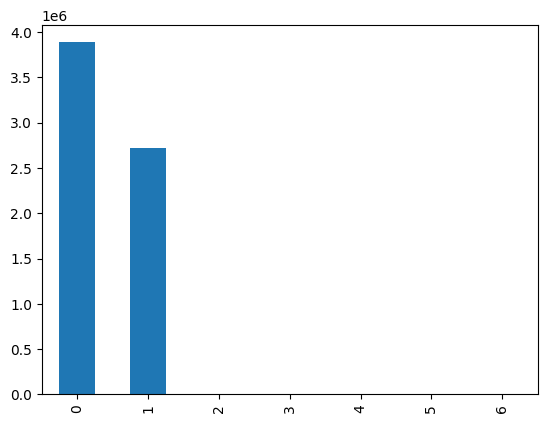

In [9]:
s.value_counts().plot.bar()

## edge purity

In [10]:
s = ak.to_dataframe(ak.flatten(tree["LS_isFake"].array()))["values"]
s.value_counts() / len(s)

1    0.925668
0    0.074332
Name: values, dtype: float64

In [11]:
tree["sim_pt"]

<TBranchElement 'sim_pt' at 0x147d3c3157e0>

In [12]:
sorted(tree.keys())

['LS_MD_idx0',
 'LS_MD_idx1',
 'LS_eta',
 'LS_isFake',
 'LS_isInTrueTC',
 'LS_phi',
 'LS_pt',
 'LS_sim_bx',
 'LS_sim_eta',
 'LS_sim_event',
 'LS_sim_pca_dxy',
 'LS_sim_pca_dz',
 'LS_sim_pdgId',
 'LS_sim_phi',
 'LS_sim_pt',
 'LS_sim_q',
 'LS_sim_vx',
 'LS_sim_vy',
 'LS_sim_vz',
 'MD_0_r',
 'MD_0_x',
 'MD_0_y',
 'MD_0_z',
 'MD_1_r',
 'MD_1_x',
 'MD_1_y',
 'MD_1_z',
 'MD_detId',
 'MD_dphichange',
 'MD_eta',
 'MD_isFake',
 'MD_layer',
 'MD_n_sim_matches',
 'MD_phi',
 'MD_pt',
 'MD_sim_idx',
 'MD_tpType',
 'pLS_eta',
 'pLS_isDuplicate',
 'pLS_isFake',
 'pLS_phi',
 'pLS_pt',
 'pLS_score',
 'pT3_eta',
 'pT3_foundDuplicate',
 'pT3_hitIdxs',
 'pT3_isDuplicate',
 'pT3_isFake',
 'pT3_layer_binary',
 'pT3_matched_pt',
 'pT3_matched_simIdx',
 'pT3_moduleType_binary',
 'pT3_phi',
 'pT3_pixelRadius',
 'pT3_pixelRadiusError',
 'pT3_pt',
 'pT3_rPhiChiSquared',
 'pT3_rPhiChiSquaredInwards',
 'pT3_rzChiSquared',
 'pT3_score',
 'pT3_tripletRadius',
 'pT5_eta',
 'pT5_hitIdxs',
 'pT5_isDuplicate',
 'pT5_isF

## Getting pt

In [13]:
tree["sim_pt"].array()[0]

<Array [0.181, 1.21, 0.906, ..., 1.06, 0.168, 0.783] type='1022 * float32'>

In [9]:
[k for k in tree.keys() if "eta" in k.casefold()]

['sim_eta',
 'tc_eta',
 'pT5_eta',
 'pT3_eta',
 'pLS_eta',
 't5_eta',
 'MD_eta',
 'MD_sim_eta',
 'LS_eta',
 'LS_sim_eta',
 't3_eta',
 't3_0_eta',
 't3_2_eta',
 't3_4_eta']

In [33]:
ak.values_astype(tree["sim_trkNtupIdx"].array(), "int64")[0].to_numpy().max()

1021

In [42]:
tree["sim_pt"].array()[40]

<Array [0.726, 1.24, 1.6, 1.35, ..., 0.285, 0.97, 0.374] type='1206 * float32'>

In [43]:
si = ak.flatten(tree["MD_sim_idx"].array()).to_numpy()

In [45]:
(si < 0).sum() / len(si)

0.5876398653305803